In [53]:
!pip install alpha_vantage
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import io
import requests


In [54]:
df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", header=0)
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316


In [55]:
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv", header=0)
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3973,3973,3973,3973,3973,3974,3974,3974,3974,3976


In [56]:
df_com=df_confirmed.set_index('Country/Region').join(df_deaths.set_index('Country/Region'), lsuffix='_x', rsuffix='_y')
display(df_com)

,Province/State_x,Lat_x,Long_x,1/22/20_x,1/23/20_x,1/24/20_x,1/25/20_x,1/26/20_x,1/27/20_x,1/28/20_x,...,4/16/22_y,4/17/22_y,4/18/22_y,4/19/22_y,4/20/22_y,4/21/22_y,4/22/22_y,4/23/22_y,4/24/22_y,4/25/22_y
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.939110,67.709953,0,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
Albania,NaN,41.153300,20.168300,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
Algeria,NaN,28.033900,1.659600,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
Andorra,NaN,42.506300,1.521800,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,NaN,-11.202700,17.873900,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,0,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
Winter Olympics 2022,NaN,39.904200,116.407400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,15.552727,48.516388,0,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149


In [57]:
df_confirmed.rename({'4/25/22': 'Confirmed Cases'}, axis=1, inplace=True)
df_deaths.rename({'4/25/22': 'Deaths'}, axis=1, inplace=True)

In [58]:
db= df_com[['Lat_x', 'Long_x', 'Confirmed Cases', 'Deaths']]
db

KeyError: "['Confirmed Cases', 'Deaths'] not in index"

In [ ]:
# checking for any null values in deaths and confirmed cases
db.isna().sum()

In [ ]:
# 4. 
import json
key = 'LH1QNQRB8AUG767R'
url= 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey='+key
stock_price=requests.get(url)
data_stock_price=stock_price.json()
data_stock_price

In [ ]:
import requests
ts= TimeSeries(key='RAC69BWCN5KL47KJ',output_format='pandas')
USA=ts.get_weekly_adjusted('PSA')
Canada=ts.get_weekly_adjusted('TSCO.LON')

In [ ]:
df1=pd.DataFrame(USA[0])
df2=pd.DataFrame(Canada[0])
print(df1)
print(df2)

In [ ]:
# high and low prices of stocks in USA by daily basis
df_USA_stocks=df1.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_USA_stocks

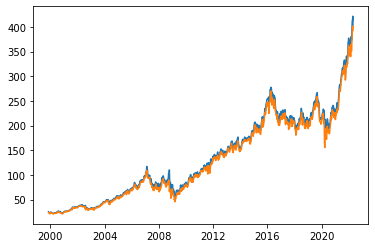

In [59]:
plt.plot(df_USA_stocks['2. high'])
plt.plot(df_USA_stocks['3. low'])

In [60]:
# high and low prices of stocks in Canada by daily basis
df_Canada_stocks=df2.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_Canada_stocks

,2. high,3. low
date,,
2022-04-25,269.7000,260.3910
2022-04-22,271.9000,262.4000
2022-04-14,275.8000,251.6088
2022-04-08,283.4000,269.1000
2022-04-01,284.4325,276.0000
...,...,...
2005-02-11,316.5001,307.7501
2005-02-04,316.5001,307.0001
2005-01-28,312.5001,305.0001


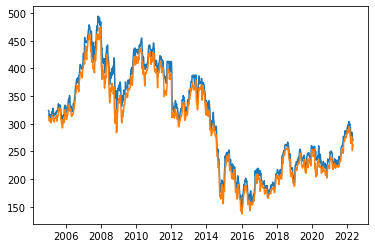

In [61]:
plt.plot(df_Canada_stocks['2. high'])
plt.plot(df_Canada_stocks['3. low'])

In [62]:
key = 'J03E9G54DQQKK36T'
stock="AC"
url= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol='+stock+'&apikey='+key
stock_price=requests.get(url)
stock_aircanada=stock_price.json()
stock_aircanada

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AC',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '39.4100',
   '2. high': '40.2126',
   '3. low': '38.2000',
   '4. close': '39.5000',
   '5. volume': '7149'},
  '2022-04-22': {'1. open': '38.2000',
   '2. high': '41.0182',
   '3. low': '36.9968',
   '4. close': '39.7600',
   '5. volume': '73740'},
  '2022-04-14': {'1. open': '37.7500',
   '2. high': '39.6390',
   '3. low': '36.5800',
   '4. close': '38.5700',
   '5. volume': '50340'},
  '2022-04-08': {'1. open': '40.8220',
   '2. high': '40.8220',
   '3. low': '36.9700',
   '4. close': '37.5600',
   '5. volume': '44755'},
  '2022-04-01': {'1. open': '41.3500',
   '2. high': '43.0964',
   '3. low': '40.5000',
   '4. close': '40.9700',
   '5. volume': '26885'},
  '2022-03-25': {'1. open': '41.1000',
   '2. high': '41.4894',
   '3. low': '39.6000',
   '4. close'

In [63]:
df1=pd.DataFrame(data_stock_price['Weekly Time Series']).transpose()

KeyError: 'Weekly Time Series'

In [ ]:
df1=df1.astype(float)
df1[['2. high', '3. low']].plot(figsize = (10,7))
plt.gca().invert_xaxis()
plt.show()

In [64]:
key = '2TW54WN94POX4QKT'
url5= 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=GOLD&apikey=%27'+key+'T%27&datatype=csv%27'
stock_price5=requests.get(url5)
stock_gold=stock_price5.json()
stock_gold

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOLD',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '22.7000',
   '2. high': '22.9650',
   '3. low': '22.2200',
   '4. close': '22.7300',
   '5. volume': '32473036'},
  '2022-04-22': {'1. open': '25.5200',
   '2. high': '25.9900',
   '3. low': '23.4800',
   '4. close': '23.7300',
   '5. volume': '98162599'},
  '2022-04-14': {'1. open': '25.7100',
   '2. high': '25.9200',
   '3. low': '24.9000',
   '4. close': '25.2000',
   '5. volume': '61147589'},
  '2022-04-08': {'1. open': '25.0900',
   '2. high': '25.4900',
   '3. low': '24.3300',
   '4. close': '25.4100',
   '5. volume': '82582791'},
  '2022-04-01': {'1. open': '24.1100',
   '2. high': '25.1300',
   '3. low': '23.6100',
   '4. close': '24.9400',
   '5. volume': '81588594'},
  '2022-03-25': {'1. open': '23.9000',
   '2. high': '24.9600',
   '3. low': '23.84

In [65]:
df5=pd.DataFrame(stock_gold['Weekly Time Series'])
df5.transpose()

,1. open,2. high,3. low,4. close,5. volume
2022-04-25,22.7000,22.9650,22.2200,22.7300,32473036
2022-04-22,25.5200,25.9900,23.4800,23.7300,98162599
2022-04-14,25.7100,25.9200,24.9000,25.2000,61147589
2022-04-08,25.0900,25.4900,24.3300,25.4100,82582791
2022-04-01,24.1100,25.1300,23.6100,24.9400,81588594
...,...,...,...,...,...
1999-12-10,17.2500,18.4400,17.1900,17.5600,6223500
1999-12-03,18.0600,18.3100,17.3100,17.4400,8455600
1999-11-26,17.8100,19.5600,17.5000,19.3800,9774400
1999-11-19,17.8800,18.6300,17.5000,17.8100,7617200


In [69]:
df5=df5.astype(float)
df5[['2. high', '3. low']].plot(figsize = (10,7),index=1)
plt.gca().invert_xaxis()
plt.show()

KeyError: "None of [Index(['2. high', '3. low'], dtype='object')] are in the [columns]"

{'Meta Data': {'1. Information': 'Weekly Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOLD',
  '3. Last Refreshed': '2022-04-25',
  '4. Time Zone': 'US/Eastern'},
 'Weekly Time Series': {'2022-04-25': {'1. open': '22.7000',
   '2. high': '22.9650',
   '3. low': '22.2200',
   '4. close': '22.7300',
   '5. volume': '32473036'},
  '2022-04-22': {'1. open': '25.5200',
   '2. high': '25.9900',
   '3. low': '23.4800',
   '4. close': '23.7300',
   '5. volume': '98162599'},
  '2022-04-14': {'1. open': '25.7100',
   '2. high': '25.9200',
   '3. low': '24.9000',
   '4. close': '25.2000',
   '5. volume': '61147589'},
  '2022-04-08': {'1. open': '25.0900',
   '2. high': '25.4900',
   '3. low': '24.3300',
   '4. close': '25.4100',
   '5. volume': '82582791'},
  '2022-04-01': {'1. open': '24.1100',
   '2. high': '25.1300',
   '3. low': '23.6100',
   '4. close': '24.9400',
   '5. volume': '81588594'},
  '2022-03-25': {'1. open': '23.9000',
   '2. high': '24.9600',
   '3. low': '23.84

In [77]:
import requests
ts= TimeSeries(key='RAC69BWCN5KL47KJ',output_format='pandas')
USA_1=ts.get_weekly_adjusted('IBM')
Canada_2=ts.get_weekly_adjusted('TSCO.LON')

In [78]:
df3=pd.DataFrame(USA_1[0])
df4=pd.DataFrame(Canada_2[0])
print(df3)
print(df4)

            1. open  2. high  3. low  4. close  5. adjusted close   6. volume  \
date                                                                            
2022-04-25   137.59   139.65  135.19    139.10           139.1000   5748289.0   
2022-04-22   126.60   141.88  125.53    138.25           138.2500  47056765.0   
2022-04-14   127.95   130.58  124.91    126.56           126.5600  15342641.0   
2022-04-08   130.26   131.23  126.73    127.73           127.7300  16553021.0   
2022-04-01   130.82   133.08  128.06    130.15           130.1500  19183786.0   
...             ...      ...     ...       ...                ...         ...   
1999-12-10   113.00   122.12  107.56    109.00            62.3912  58626000.0   
1999-12-03   104.94   112.87  102.12    111.87            64.0340  37670000.0   
1999-11-26   105.50   109.87  101.81    105.00            60.1017  37165600.0   
1999-11-19    96.00   105.12   92.62    103.94            59.4949  61550800.0   
1999-11-12    90.50    97.50

In [79]:
df_USA_stocks=df3.drop(['1. open', '4. close','5. adjusted close','6. volume','7. dividend amount'], axis=1)
df_USA_stocks

,2. high,3. low
date,,
2022-04-25,139.65,135.19
2022-04-22,141.88,125.53
2022-04-14,130.58,124.91
2022-04-08,131.23,126.73
2022-04-01,133.08,128.06
...,...,...
1999-12-10,122.12,107.56
1999-12-03,112.87,102.12
1999-11-26,109.87,101.81


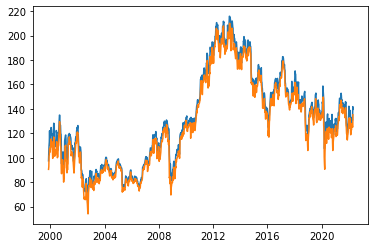

In [80]:
plt.plot(df_USA_stocks['2. high'])
plt.plot(df_USA_stocks['3. low'])